In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [140]:
import warnings
warnings.filterwarnings('ignore')

In [141]:
df = sns.load_dataset('titanic')

In [142]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [143]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


# PREDICT, the person will survive or not..!!!

## Using Classification Model

In [144]:
df.drop(['class','deck','embark_town','alive'], axis=1, inplace=True)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         714 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    object 
 8   who         891 non-null    object 
 9   adult_male  891 non-null    bool   
 10  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 64.5+ KB


## Fill the None value of age

In [146]:
alones = df['alone'].unique()
survives = df['survived'].unique()
pclasses = df['pclass'].unique()
sexs = df['sex'].unique()
ageMean = df.groupby(['alone','survived','pclass','sex'])['age'].mean()
def treatMissingAge(x):
    age = x['age']
    alone = x['alone']
    survived = x['survived']
    pclass = x['pclass']
    sex = x['sex']
    if pd.isnull(age):
        for alone1 in alones:
            for survived1 in survives:
                for pclass1 in pclasses:
                    for sex1 in sexs:
                        if (alone1 == alone) and (survived1==survived) and (pclass1 == pclass) and (sex1 == sex):
                            return int(ageMean[alone][survived][pclass][sex])
    else:
        return int(age)

In [147]:
df['age']=df[['age','alone','survived','pclass','sex']].apply(treatMissingAge,axis=1)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    int64  
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    object 
 8   who         891 non-null    object 
 9   adult_male  891 non-null    bool   
 10  alone       891 non-null    bool   
dtypes: bool(2), float64(1), int64(5), object(3)
memory usage: 64.5+ KB


In [149]:
df.dropna(inplace=True)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    889 non-null    int64  
 1   pclass      889 non-null    int64  
 2   sex         889 non-null    object 
 3   age         889 non-null    int64  
 4   sibsp       889 non-null    int64  
 5   parch       889 non-null    int64  
 6   fare        889 non-null    float64
 7   embarked    889 non-null    object 
 8   who         889 non-null    object 
 9   adult_male  889 non-null    bool   
 10  alone       889 non-null    bool   
dtypes: bool(2), float64(1), int64(5), object(3)
memory usage: 71.2+ KB


In [151]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22,1,0,7.2500,S,man,True,False
1,1,1,female,38,1,0,71.2833,C,woman,False,False
2,1,3,female,26,0,0,7.9250,S,woman,False,True
3,1,1,female,35,1,0,53.1000,S,woman,False,False
4,0,3,male,35,0,0,8.0500,S,man,True,True


In [152]:
df['male'] = pd.get_dummies(df['sex'],drop_first=True)
df['male']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: male, Length: 889, dtype: uint8

In [153]:
emb = pd.get_dummies(df['embarked'])
who = pd.get_dummies(df['who'])
who
# adult_male = pd.get_dummies(df['adult_male'],drop_first=True)
# alone = pd.get_dummies(df['alone'],drop_first=True)

,child,man,woman
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
886,0,1,0
887,0,0,1
888,0,0,1
889,0,1,0


In [154]:
# df['adult_male'] = adult_male
# df['alone'] = alone
df = pd.concat([df,emb,who], axis=1)

In [155]:
df.drop(['sex','embarked','who'], axis=1, inplace=True)
df

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,male,C,Q,S,child,man,woman
0,0,3,22,1,0,7.2500,True,False,1,0,0,1,0,1,0
1,1,1,38,1,0,71.2833,False,False,0,1,0,0,0,0,1
2,1,3,26,0,0,7.9250,False,True,0,0,0,1,0,0,1
3,1,1,35,1,0,53.1000,False,False,0,0,0,1,0,0,1
4,0,3,35,0,0,8.0500,True,True,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,True,True,1,0,0,1,0,1,0
887,1,1,19,0,0,30.0000,False,True,0,0,0,1,0,0,1
888,0,3,23,1,2,23.4500,False,False,0,0,0,1,0,0,1
889,1,1,26,0,0,30.0000,True,True,1,1,0,0,0,1,0


In [156]:
df.drop(['adult_male','alone','child','man','woman'], axis=1, inplace=True)

In [110]:
df.head()

,survived,pclass,age,sibsp,parch,fare,male,C,Q,S
0,0,3,22,1,0,7.2500,1,0,0,1
1,1,1,38,1,0,71.2833,0,1,0,0
2,1,3,26,0,0,7.9250,0,0,0,1
3,1,1,35,1,0,53.1000,0,0,0,1
4,0,3,35,0,0,8.0500,1,0,0,1


In [157]:
df1 = df.copy()

In [160]:
def xyz(x):
    return int(x['fare'])

In [161]:
df1['fare'] = df1[['fare']].apply(xyz,axis=1)

In [163]:
df1.head()

,survived,pclass,age,sibsp,parch,fare,male,C,Q,S
0,0,3,22,1,0,7,1,0,0,1
1,1,1,38,1,0,71,0,1,0,0
2,1,3,26,0,0,7,0,0,0,1
3,1,1,35,1,0,53,0,0,0,1
4,0,3,35,0,0,8,1,0,0,1


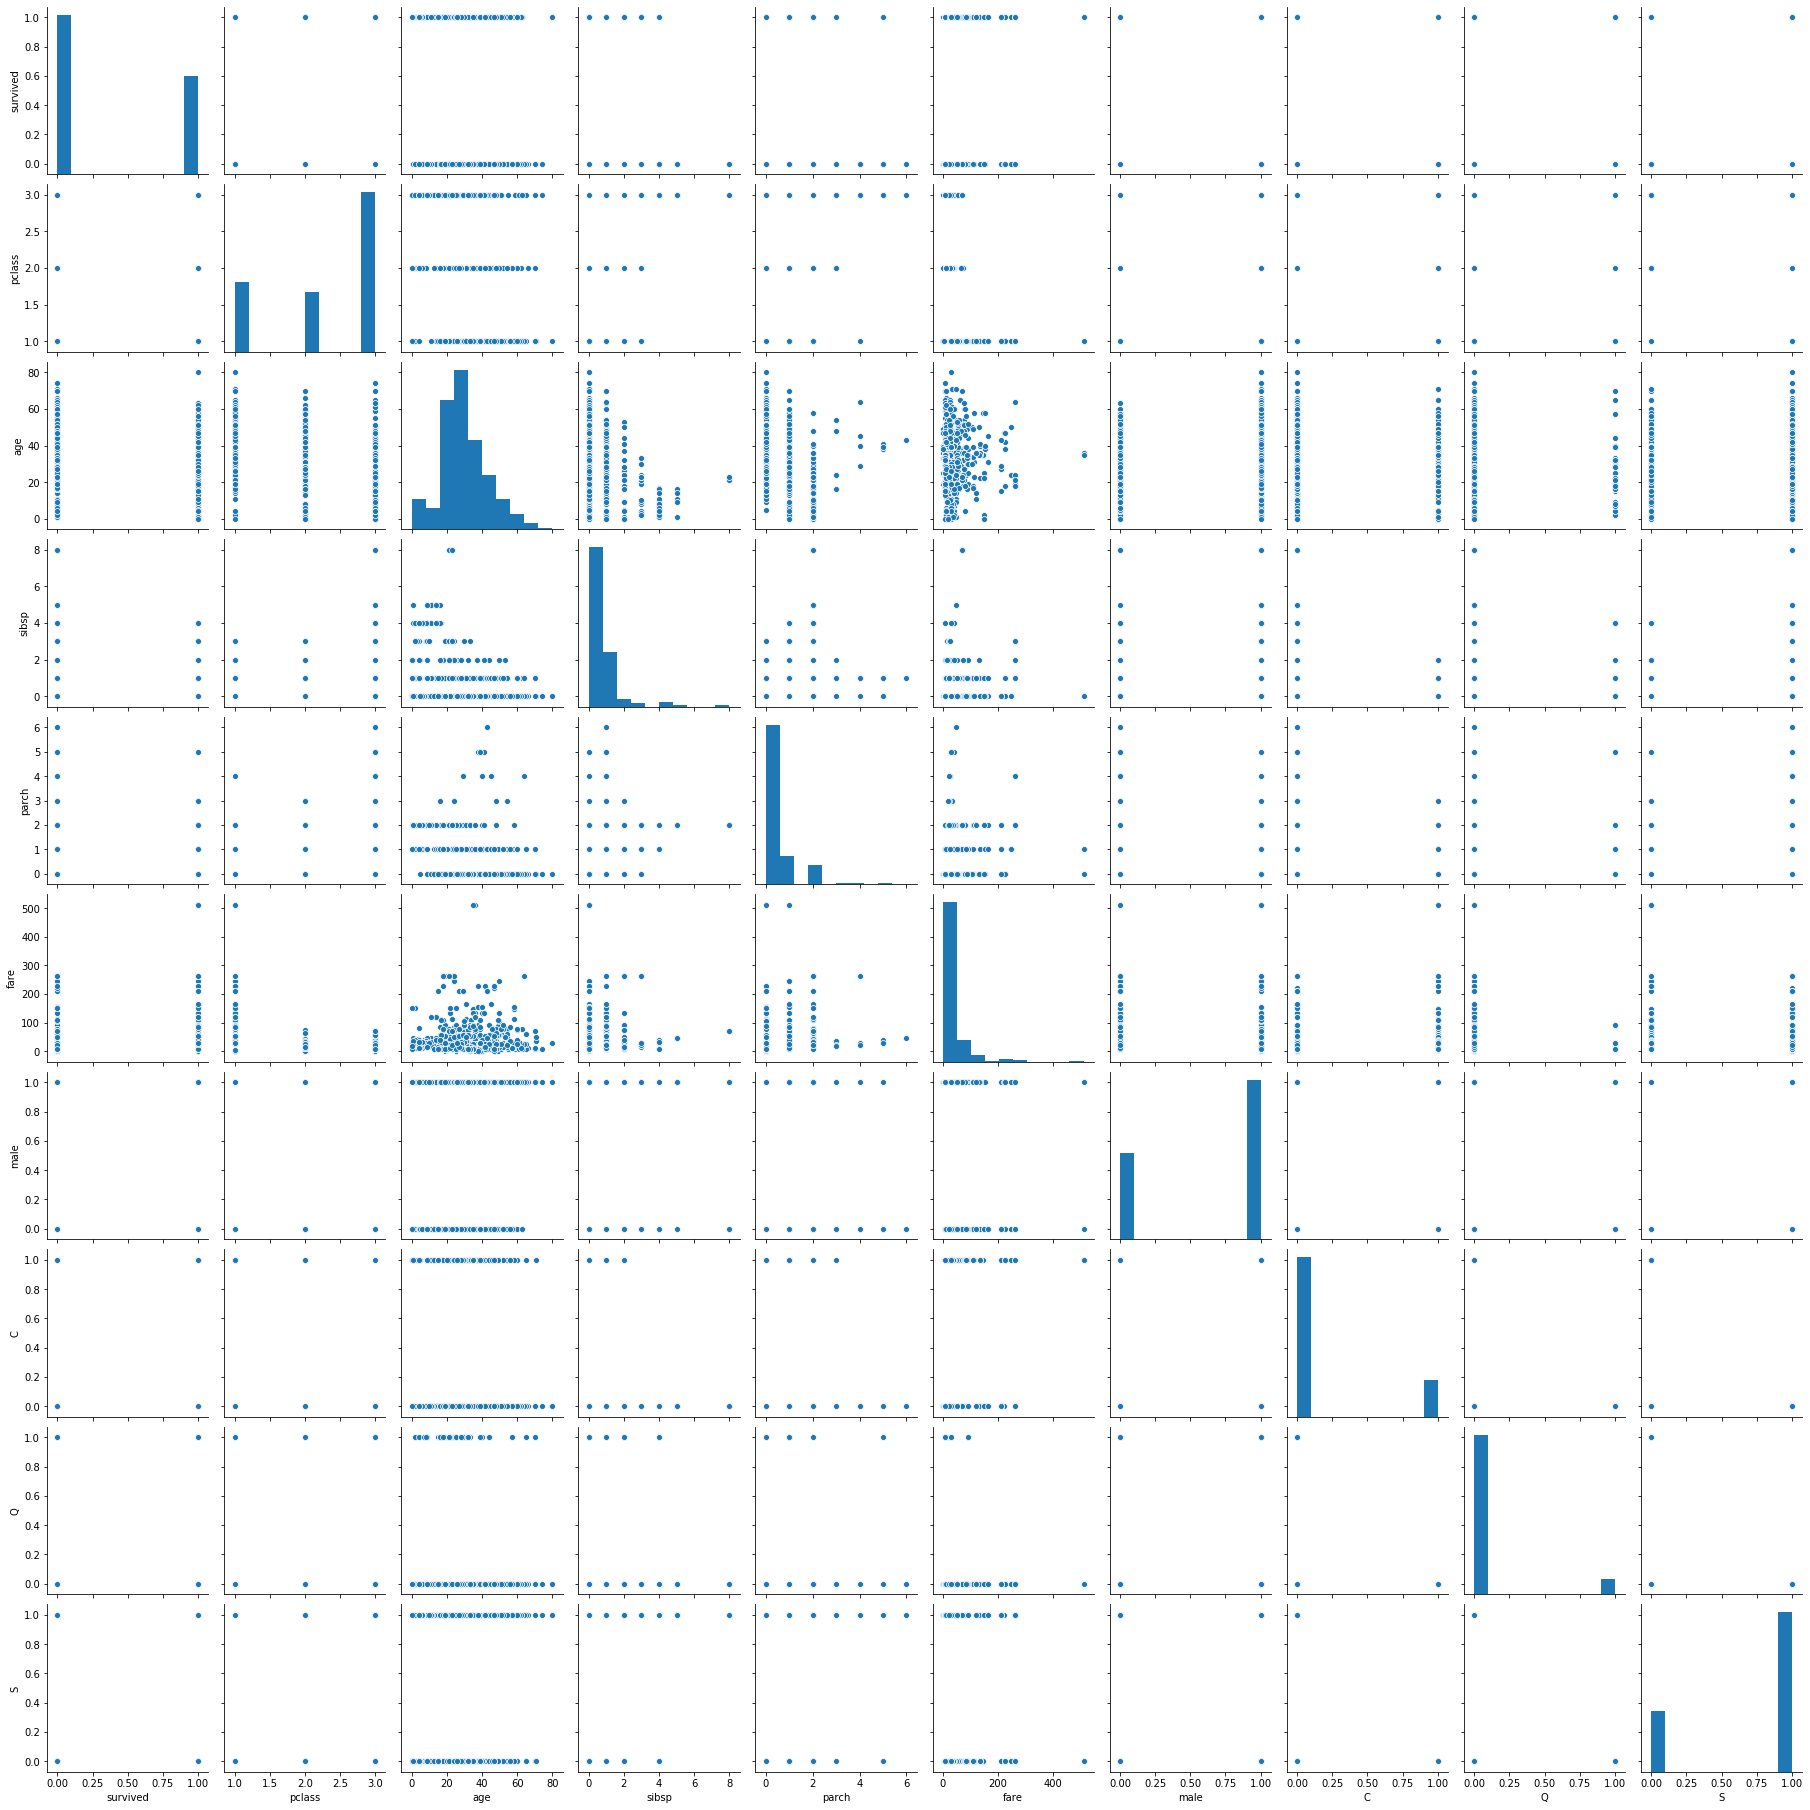

In [164]:
sns.pairplot(df1)

# sns.pairplot(df,hue='survived')

In [21]:
x = df.drop('survived',axis=1)
y = df['survived']

In [22]:
x.head()

,pclass,age,sibsp,parch,fare,male,C,Q,S
0,3,22,1,0,7.2500,1,0,0,1
1,1,38,1,0,71.2833,0,1,0,0
2,3,26,0,0,7.9250,0,0,0,1
3,1,35,1,0,53.1000,0,0,0,1
4,3,35,0,0,8.0500,1,0,0,1


In [23]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

## Now use of Logistic Regression(Classification)

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=101)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression().fit(xtrain,ytrain)

In [30]:
#r2 score
model.score(xtest,ytest)

0.8277153558052435

In [28]:
ypred = model.predict(xtest)
ypred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [29]:
ytest

511    0
613    0
615    1
337    1
718    0
      ..
792    0
828    1
732    0
669    1
634    0
Name: survived, Length: 267, dtype: int64

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
print('Confusion Matrix')
print(confusion_matrix(ytest,ypred))

Confusion Matrix
[[148  15]
 [ 31  73]]


In [35]:
print('Classification Report')
print(classification_report(ytest,ypred))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.83      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [36]:
yt = ytest.apply(lambda x:'Survived' if x else 'Died')
yt

511        Died
613        Died
615    Survived
337    Survived
718        Died
         ...   
792        Died
828    Survived
732        Died
669    Survived
634        Died
Name: survived, Length: 267, dtype: object

In [37]:
yp = pd.Series(ypred).apply(lambda x:'Survived' if x else 'Died')

In [38]:
print('Classification Report')
print(classification_report(yt,yp))

Classification Report
              precision    recall  f1-score   support

        Died       0.83      0.91      0.87       163
    Survived       0.83      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



#### GIVEN INPUT 
###### Class (1st ,2nd, 3rd)
###### passenger's age
###### Sibsp -( Number of Siblings/Spouses Aboard)  
###### Parch - (Number of Parents/Children),
###### Fare
#####  Male
##### C = Cherbourg
##### Q = Queenstown 
##### S = Southampton.

In [39]:
cols= ['pclass','age','sibsp','parch','fare','male','C','Q','S']

### Please Give Input

In [40]:
d = {i:[eval(input('Enter '+i+': '))] for i in cols}

Enter pclass: 3
Enter age: 53
Enter sibsp: 1
Enter parch: 0
Enter fare: 56
Enter male: 1
Enter C: 0
Enter Q: 0
Enter S: 1


In [41]:
queryData = pd.DataFrame(d)
queryData

,pclass,age,sibsp,parch,fare,male,C,Q,S
0,3,53,1,0,56,1,0,0,1


### Now Check Person is survived or not

In [42]:
result = model.predict(queryData)[0]
result
if(result==1):
    print("PERSON HAS SURVIVED\n")
else:
    print("PERSON HAS DIED\n");

PERSON HAS DIED



## Using KNN Algorithm

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
Knn=KNeighborsClassifier(n_neighbors=24).fit(xtrain,ytrain)
yp2=Knn.predict(xtest)

In [45]:
Knn.score(xtest,ytest)

0.6966292134831461

In [46]:
print('Classification Report',classification_report(ytest,yp2),sep='\n')

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       163
           1       0.64      0.50      0.56       104

    accuracy                           0.70       267
   macro avg       0.68      0.66      0.67       267
weighted avg       0.69      0.70      0.69       267



In [47]:
err2 = []
for i in range(1,50):
    Knn = KNeighborsClassifier(n_neighbors=i).fit(xtrain, ytrain)
    pred = Knn.predict(xtest)
    err2 += [np.mean(pred != ytest)]

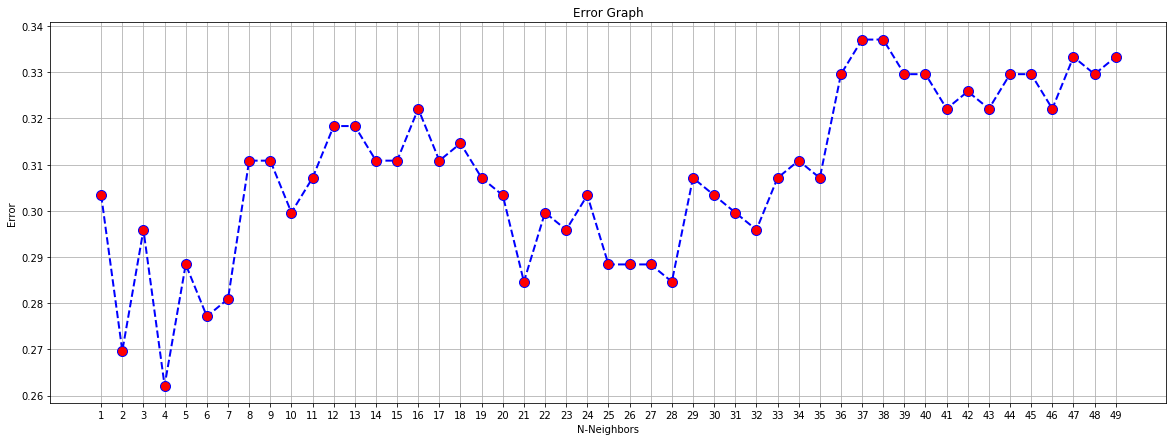

In [49]:
plt.figure(figsize=(20,7))
plt.plot(range(1,50),err2, color='blue', ls='--', lw=2, marker='o',markerfacecolor='red', markersize=10)
plt.xlabel('N-Neighbors')
plt.ylabel('Error')
plt.xticks(range(1,50))
plt.title('Error Graph')
plt.grid()

In [50]:
cols= ['pclass','age','sibsp','parch','fare','male','C','Q','S']

### Please Give Input

In [51]:
d = {i:[eval(input('Enter '+i+': '))] for i in cols}

Enter pclass: 1
Enter age: 54
Enter sibsp: 0
Enter parch: 1
Enter fare: 21
Enter male: 1
Enter C: 0
Enter Q: 0
Enter S: 1


In [52]:
queryData = pd.DataFrame(d)
queryData

,pclass,age,sibsp,parch,fare,male,C,Q,S
0,1,54,0,1,21,1,0,0,1


In [53]:
result = Knn.predict(queryData)[0]
if(result==1):
    print("PERSON HAS SURVIVED\n")
else:
    print("PERSON HAS DIED\n");

PERSON HAS DIED



## Using Decision tree classifier

In [54]:
df.head()

,survived,pclass,age,sibsp,parch,fare,male,C,Q,S
0,0,3,22,1,0,7.2500,1,0,0,1
1,1,1,38,1,0,71.2833,0,1,0,0
2,1,3,26,0,0,7.9250,0,0,0,1
3,1,1,35,1,0,53.1000,0,0,0,1
4,0,3,35,0,0,8.0500,1,0,0,1


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [56]:
dtmodel=DecisionTreeClassifier().fit(xtrain,ytrain)
dtypred=dtmodel.predict(xtest)

In [58]:
print(dtmodel.score(xtest,ytest))
print(classification_report(ytest,dtypred))
print(confusion_matrix(ytest,dtypred))

0.7827715355805244
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       163
           1       0.73      0.70      0.72       104

    accuracy                           0.78       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267

[[136  27]
 [ 31  73]]


### Please Give Input

In [59]:
cols= ['pclass','age','sibsp','parch','fare','male','C','Q','S']
d = {i:[eval(input('Enter '+i+': '))] for i in cols}

Enter pclass: 1
Enter age: 56
Enter sibsp: 0
Enter parch: 0
Enter fare: 41
Enter male: 1
Enter C: 0
Enter Q: 1
Enter S: 0


In [62]:
result = dtmodel.predict(queryData)[0]
if(result==1):
    print("PERSON HAS SURVIVED\n")
else:
    print("PERSON HAS DIED\n");

PERSON HAS DIED



### Random Forest Model

In [63]:
forestmodel=RandomForestClassifier().fit(xtrain,ytrain)
forestpred=forestmodel.predict(xtest)

In [64]:
print(forestmodel.score(xtest,ytest))

0.8202247191011236


In [65]:
print(classification_report(ytest,forestpred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       163
           1       0.79      0.74      0.76       104

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



In [66]:
print(confusion_matrix(ytest,forestpred))

[[142  21]
 [ 27  77]]


### Please Give Input

In [71]:
cols= ['pclass','age','sibsp','parch','fare','male','C','Q','S']
d = {i:[eval(input('Enter '+i+': '))] for i in cols}

Enter pclass: 1
Enter age: 52
Enter sibsp: 1
Enter parch: 0
Enter fare: 34
Enter male: 1
Enter C: 1
Enter Q: 0
Enter S: 0


In [72]:
result = dtmodel.predict(queryData)[0]
if(result==1):
    print("PERSON HAS SURVIVED\n")
else:
    print("PERSON HAS DIED\n");

PERSON HAS DIED



## Prediction through SVM MODEL

In [73]:
from sklearn.svm import SVC

In [75]:
SVCmodel=SVC().fit(xtrain,ytrain)
SVCpred=SVCmodel.predict(xtest)

In [76]:
print(SVCmodel.score(xtest,ytest))
print(classification_report(ytest,SVCpred))
print(confusion_matrix(ytest,SVCpred))

0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       163
           1       0.65      0.31      0.42       104

    accuracy                           0.67       267
   macro avg       0.66      0.60      0.59       267
weighted avg       0.66      0.67      0.63       267

[[146  17]
 [ 72  32]]


In [79]:
cols= ['pclass','age','sibsp','parch','fare','male','C','Q','S']
d = {i:[eval(input('Enter '+i+': '))] for i in cols}

Enter pclass: 3
Enter age: 54
Enter sibsp: 0
Enter parch: 1
Enter fare: 56.5
Enter male: 1
Enter C: 0
Enter Q: 0
Enter S: 1


In [80]:
result = dtmodel.predict(queryData)[0]
if(result==1):
    print("PERSON HAS SURVIVED\n")
else:
    print("PERSON HAS DIED\n");

PERSON HAS DIED



#### HERE LOGISTIC REGRESSION HAS BEST ACCURACY

In [ ]:
from sklearn.model_selection import GridSearchCV

In [85]:
params = {'C':[0.1,1,10,100,1000,10000], 'gamma':[1,0.1,0.01,0.001,0.0001,], 'kernel':['linear', 'rbf', 'sigmoid']}

In [86]:
gridModel = GridSearchCV(SVC(), params, refit=True, verbose=3).fit(xtrain,ytrain)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.7451923076923077, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.7932692307692307, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.8203883495145631, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6201923076923077, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6213592233009708, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV]  C=0.1, gamma=1, kernel=sigmoid, score=0.6201923076923077, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV]  C=0.1, gamma=1, kernel=sigmoid, score=0.6201923076923077, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV]  C=0.1, gamma=1, kernel=sigmoid, score=0.6213592233009708, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=0.7451923076923077, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .....

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 63.3min finished
